In [37]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import re

In [38]:

# Function to fetch data from SQLite database
def fetch_data(query):
    conn = sqlite3.connect("../BTC_data.db")
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df


# C:\Users\likio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\Scripts\streamlit run stream.py
# streamlit run C:/Users/jbethune/Desktop/ML_introbook/Portfolio_AlexBP/src/flutte.py



In [39]:
df = fetch_data("SELECT * FROM Liquidations24h ORDER BY Timestamp DESC LIMIT 30")

In [40]:
from multiprocessing import process


def process_data(df):
    if "Unnamed: 0" in df.columns:
        # Drop unnecessary columns
        df = df.drop(columns=['index', 'Unnamed: 0'])
    
    # Convert string representations of numbers to actual numbers
    df['%_Exchanges'] = df['%_Exchanges'].str.rstrip('%').astype(float) / 100
    
    # Convert Timestamp to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    return df

df = process_data(df)

In [41]:
df.head()

,Timestamp,Grupo,Total_liquidations/1000,Long Liquidations,Short Liquidations,Long/Short Ratio,Short/Long Ratio,%_Exchanges
0,2023-10-30 23:36:30,BINANCE,"3,759",880,"2,879",0.31,3.27,0.6443
1,2023-10-30 23:36:30,BYBIT,651.0,180,471,0.38,2.62,0.1115
2,2023-10-30 23:36:30,HUOBI,318.0,18,300,0.06,17.09,0.0545
3,2023-10-30 23:36:30,OKX,986.0,158,828,0.19,5.24,0.1691
4,2023-10-30 23:36:30,TODO,"5,833","1,245","4,589",0.27,3.69,1.0000


In [42]:
# Create one pie plot that represents the different percentages per exchange, expclude from the plot the TODO row, or the value that corresponds to 1. Aka ALL. Only for the 5 more recent rows (equivalent to abatch)

# Create a bar plot for the Long liquidations of row of a batch ( 5 rows more recent) next to  the Short liquidations value


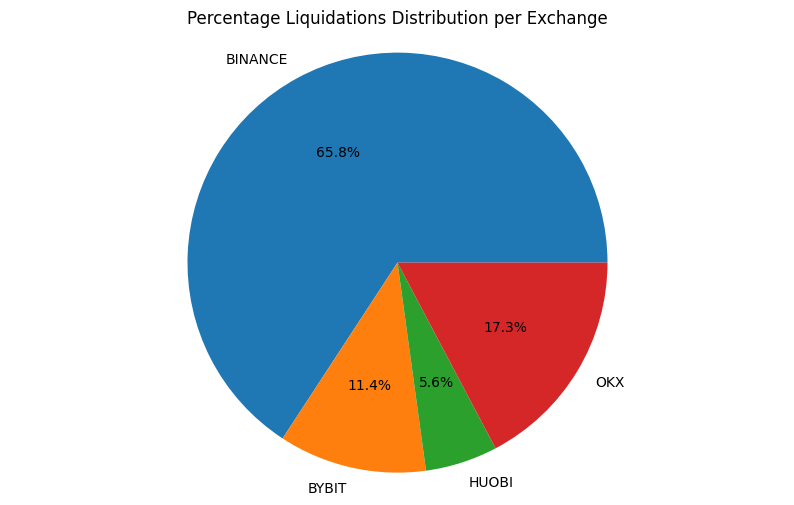

In [48]:
# Filter out the 'TODO' row and select the 5 most recent rows
filtered_df = df[df['Grupo'] != 'TODO'].head(4)

# Pie Plot
plt.figure(figsize=(10, 6))
plt.pie(filtered_df['%_Exchanges'], labels=filtered_df['Grupo'], autopct='%1.1f%%')
plt.title('Percentage Liquidations Distribution per Exchange')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


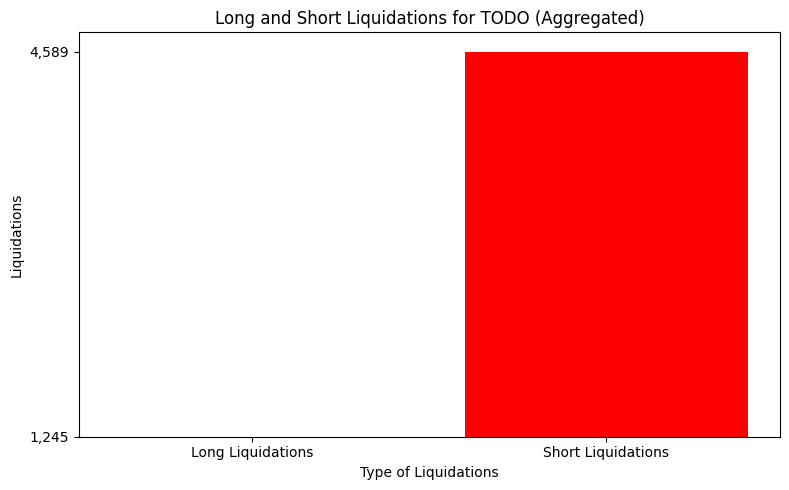

In [51]:
todo_df = df[df['Grupo'] == 'TODO']

# Bar Plot for 'TODO' row
plt.figure(figsize=(8, 5))
x = ['Long Liquidations', 'Short Liquidations']
y = [todo_df['Long Liquidations'].values[0], todo_df['Short Liquidations'].values[0]]
plt.bar(x, y, color=['b', 'r'])
plt.xlabel('Type of Liquidations')
plt.ylabel('Liquidations')
plt.title('Long and Short Liquidations for TODO (Aggregated)')
plt.tight_layout()
plt.show()

In [53]:
import streamlit as st
import pandas as pd
import plotly.express as px
from streamlit_option_menu import option_menu
from numerize.numerize import numerize
#from query import *
import time

st.set_page_config(page_title="Dashboard",page_icon="🌍",layout="wide")
st.subheader("🔔  Analytics Dashboard")
st.markdown("##")

theme_plotly = None # None or streamlit

# Style
with open('style.css')as f:
    st.markdown(f"<style>{f.read()}</style>", unsafe_allow_html = True)

#fetch data
#result = view_all_data()
#df=pd.DataFrame(result,columns=["Policy","Expiry","Location","State","Region","Investment","Construction","BusinessType","Earthquake","Flood","Rating","id"])

 
#load excel file
df=pd.read_excel('data.xlsx', sheet_name='Sheet1')

#side bar
st.sidebar.image("data/logo1.png",caption="Developed and Maintaned by: samir: +255675839840")

#switcher
st.sidebar.header("Please filter")
region=st.sidebar.multiselect(
    "Select Region",
     options=df["Region"].unique(),
     default=df["Region"].unique(),
)
location=st.sidebar.multiselect(
    "Select Location",
     options=df["Location"].unique(),
     default=df["Location"].unique(),
)
construction=st.sidebar.multiselect(
    "Select Construction",
     options=df["Construction"].unique(),
     default=df["Construction"].unique(),
)

df_selection=df.query(
    "Region==@region & Location==@location & Construction ==@construction"
)

def Home():
    with st.expander("⏰ My Excel WorkBook"):
        showData=st.multiselect('Filter: ',df_selection.columns,default=["Policy","Expiry","Location","State","Region","Investment","Construction","BusinessType","Earthquake","Flood","Rating"])
        st.dataframe(df_selection[showData],use_container_width=True)
    #compute top analytics
    total_investment = float(df_selection['Investment'].sum())
    investment_mode = float(df_selection['Investment'].mode())
    investment_mean = float(df_selection['Investment'].mean())
    investment_median= float(df_selection['Investment'].median()) 
    rating = float(df_selection['Rating'].sum())


    total1,total2,total3,total4,total5=st.columns(5,gap='large')
    with total1:
        st.info('Total Investment',icon="📌")
        st.metric(label="sum TZS",value=f"{total_investment:,.0f}")

    with total2:
        st.info('Most frequent',icon="📌")
        st.metric(label="mode TZS",value=f"{investment_mode:,.0f}")

    with total3:
        st.info('Average',icon="📌")
        st.metric(label="average TZS",value=f"{investment_mean:,.0f}")

    with total4:
        st.info('Central Earnings',icon="📌")
        st.metric(label="median TZS",value=f"{investment_median:,.0f}")

    with total5:
        st.info('Ratings',icon="📌")
        st.metric(label="Rating",value=numerize(rating),help=f""" Total Rating: {rating} """)

    st.markdown("""---""")

#graphs

def graphs():
    #total_investment=int(df_selection["Investment"]).sum()
    #averageRating=int(round(df_selection["Rating"]).mean(),2)
    
    #simple bar graph
    investment_by_business_type=(
        df_selection.groupby(by=["BusinessType"]).count()[["Investment"]].sort_values(by="Investment")
    )
    fig_investment=px.bar(
       investment_by_business_type,
       x="Investment",
       y=investment_by_business_type.index,
       orientation="h",
       title="<b> Investment by Business Type </b>",
       color_discrete_sequence=["#0083B8"]*len(investment_by_business_type),
       template="plotly_white",
    )


    fig_investment.update_layout(
    plot_bgcolor="rgba(0,0,0,0)",
    xaxis=(dict(showgrid=False))
     )

        #simple line graph
    investment_state=df_selection.groupby(by=["State"]).count()[["Investment"]]
    fig_state=px.line(
       investment_state,
       x=investment_state.index,
       y="Investment",
       orientation="v",
       title="<b> Investment by State </b>",
       color_discrete_sequence=["#0083b8"]*len(investment_state),
       template="plotly_white",
    )
    fig_state.update_layout(
    xaxis=dict(tickmode="linear"),
    plot_bgcolor="rgba(0,0,0,0)",
    yaxis=(dict(showgrid=False))
     )

    left,right,center=st.columns(3)
    left.plotly_chart(fig_state,use_container_width=True)
    right.plotly_chart(fig_investment,use_container_width=True)
    
    with center:
      #pie chart
      fig = px.pie(df_selection, values='Rating', names='State', title='Regions by Ratings')
      fig.update_layout(legend_title="Regions", legend_y=0.9)
      fig.update_traces(textinfo='percent+label', textposition='inside')
      st.plotly_chart(fig, use_container_width=True, theme=theme_plotly)
     
def Progressbar():
    st.markdown("""<style>.stProgress > div > div > div > div { background-image: linear-gradient(to right, #99ff99 , #FFFF00)}</style>""",unsafe_allow_html=True,)
    target=3000000000
    current=df_selection["Investment"].sum()
    percent=round((current/target*100))
    mybar=st.progress(0)

    if percent>100:
        st.subheader("Target done !")
    else:
     st.write("you have ",percent, "% " ,"of ", (format(target, 'd')), "TZS")
     for percent_complete in range(percent):
        time.sleep(0.1)
        mybar.progress(percent_complete+1,text=" Target Percentage")


def sideBar():

 with st.sidebar:
    selected=option_menu(
        menu_title="Main Menu",
        options=["Home","Progress"],
        icons=["house","eye"],
        menu_icon="cast",
        default_index=0
    )
 if selected=="Home":
    #st.subheader(f"Page: {selected}")
    Home()
    graphs()
 if selected=="Progress":
    #st.subheader(f"Page: {selected}")
    Progressbar()
    graphs()

sideBar()



#theme
hide_st_style=""" 

<style>
#MainMenu {visibility:hidden;}
footer {visibility:hidden;}
header {visibility:hidden;}
</style>
"""




2023-11-02 19:26:25.251 Serialization of dataframe to Arrow table was unsuccessful due to: ("Expected bytes, got a 'float' object", 'Conversion failed for column Total_liquidations/1000 with type object'). Applying automatic fixes for column types to make the dataframe Arrow-compatible.


DeltaGenerator()